<a href="https://colab.research.google.com/github/jayeshbhandarkar/Soft-Computing-Lab/blob/main/Linear_Regression_using_Single_Neural_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

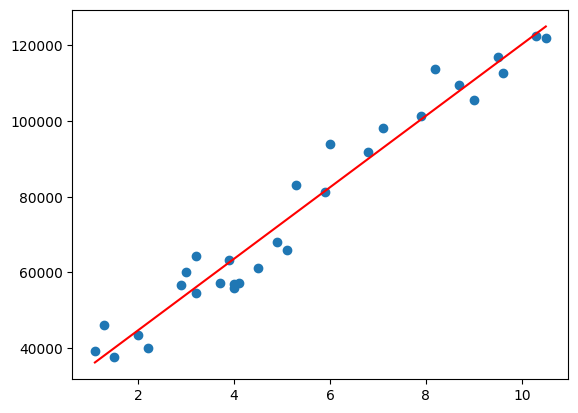

In [2]:
data = pd.read_csv('Salary_Data.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
Y = data.iloc[:, 1].values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
Y_pred = lin_reg.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

**Using Single Neuron Model**

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
np.random.seed(101)
tf.random.set_seed(101)

In [5]:
x = np.linspace(0, 25, 100)
y = np.linspace(0, 25, 100)
# Adding noise to the random Linear Data
x += np.random.uniform(-4, 4, 100)
y += np.random.uniform(-4, 4, 100)
n = len(x) # Number of data points

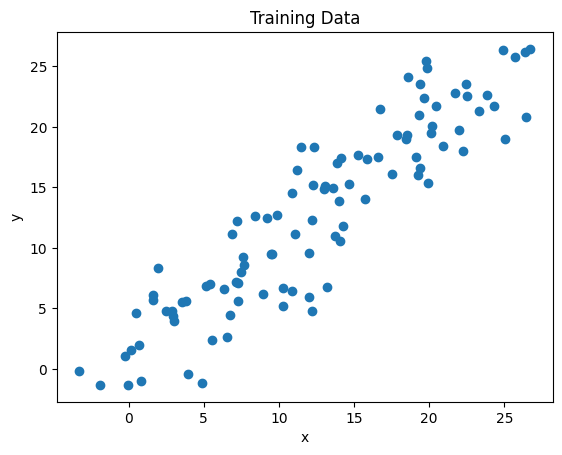

In [6]:
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [9]:
W = tf.Variable(np.random.randn(), name="W")
b = tf.Variable(np.random.randn(), name="b")

In [10]:
learning_rate = 0.01
training_epochs = 1000

In [11]:
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2))/(2*n)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()

In [12]:
# Starting the Tensorflow Session
with tf.Session() as sess:

  # Initializing the Variables
  sess.run(init)

  # Iterating through all the epochs
  for epoch in range(training_epochs):

    # Feeding each data point into the optimizer using Feed Dictionary
    for (_x, _y) in zip(x, y):
      sess.run(optimizer, feed_dict = {X : _x, Y : _y})

    # Displaying the result after every 50 epochs
    if (epoch + 1) % 50 == 0:
      # Calculating the cost a every epoch
      c = sess.run(cost, feed_dict = {X : x, Y : y})
      print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))

  # Storing necessary values to be used outside the Session
  training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
  weight = sess.run(W)
  bias = sess.run(b)

Epoch 50 : cost = 5.0503244 W = 0.9835112 b = 0.14373533
Epoch 100 : cost = 5.000951 W = 0.9753103 b = 0.31200755
Epoch 150 : cost = 4.9645123 W = 0.9681324 b = 0.4592994
Epoch 200 : cost = 4.937812 W = 0.961849 b = 0.58822864
Epoch 250 : cost = 4.91842 W = 0.95634913 b = 0.7010838
Epoch 300 : cost = 4.9044952 W = 0.951535 b = 0.7998663
Epoch 350 : cost = 4.8946433 W = 0.9473212 b = 0.8863343
Epoch 400 : cost = 4.8878093 W = 0.94363254 b = 0.9620219
Epoch 450 : cost = 4.8832 W = 0.94040394 b = 1.0282723
Epoch 500 : cost = 4.880215 W = 0.9375775 b = 1.086269
Epoch 550 : cost = 4.878408 W = 0.93510383 b = 1.1370277
Epoch 600 : cost = 4.877444 W = 0.93293846 b = 1.18146
Epoch 650 : cost = 4.877072 W = 0.9310429 b = 1.220356
Epoch 700 : cost = 4.877108 W = 0.9293839 b = 1.254396
Epoch 750 : cost = 4.877418 W = 0.92793167 b = 1.2841942
Epoch 800 : cost = 4.877902 W = 0.9266605 b = 1.3102798
Epoch 850 : cost = 4.8784885 W = 0.9255478 b = 1.3331128
Epoch 900 : cost = 4.8791265 W = 0.9245738 b

In [13]:
# Calculating the Predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 4.8804255 Weight = 0.9229752 bias = 1.3859004 



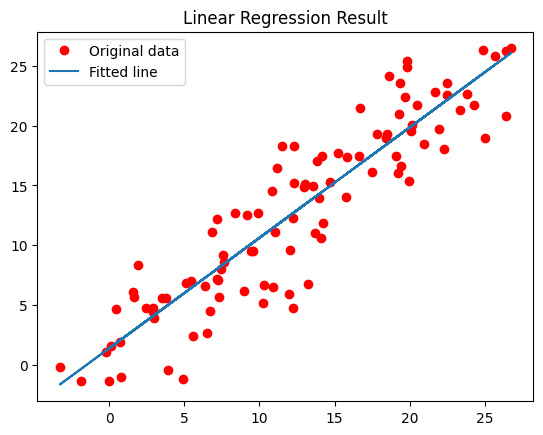

In [14]:
# Plotting the Results
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()